
# Practical Introduction to Deep Learning Basics

In [ ]:

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


## Load Data

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#(x_train, y_train), (x_test, y_test) = mnist.load_data(path='/gpfs/projects/nct00/nct00002/basics-utils/mnist.npz')

11501568/11490434 [==============================] - 0s 0us/step


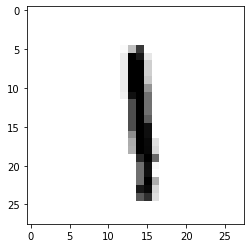

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[8], cmap=plt.cm.binary)



In [ ]:
print(y_train[8])

1


In [ ]:
print(x_train.ndim)

3


In [ ]:
print(x_train.shape)

(60000, 28, 28)


In [ ]:
print(x_train.dtype) 

uint8


## Prepare data

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
from tensorflow.keras.utils import to_categorical


In [ ]:
print(y_test[0])

7


In [ ]:
print(y_train[0])

5


In [ ]:
print(y_train.shape)

(60000,)


In [ ]:
print(x_test.shape)

(10000, 784)


In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


print(y_test[0])


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
print(y_train.shape)

(60000, 10)


In [ ]:
print(y_test.shape)

(10000, 10)


## Define Model

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


## Compile model (configuration)

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics = ['accuracy'])


## Training the model

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 5ms/step - loss: 1.9331 - accuracy: 0.4636
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 1.3725 - accuracy: 0.6835
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 1.0521 - accuracy: 0.7629
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8493 - accuracy: 0.8181
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7141 - accuracy: 0.8478


## Evaluation the model

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6475 - accuracy: 0.8629


In [ ]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8629000186920166


In [ ]:
# Look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

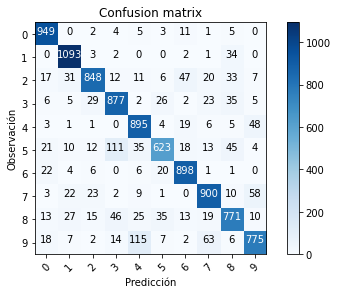

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

## Use the model 

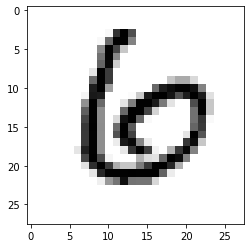

In [ ]:
x_test_old = x_test.reshape(10000, 28,28)
plt.imshow(x_test_old[11], cmap=plt.cm.binary)

In [ ]:
predictions = model.predict(x_test)

In [ ]:
np.argmax(predictions[11])

6

In [ ]:
print(predictions[11])

[0.17474876 0.01768255 0.23634468 0.02394927 0.05061892 0.05912747
 0.38026753 0.00195343 0.04077056 0.01453686]


In [ ]:
np.sum(predictions[11])

1.0

# Convolutional Neural Network


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [ ]:
from tensorflow.keras.utils import to_categorical

#mnist = tf.keras.datasets.mnist(train_images, train_labels), (test_images, test_labels) = mnist.load_data(path='/gpfs/projects/nct00/nct00002/basics-utils/mnist.npz')

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print (train_images.shape)
print (train_labels.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print (train_images.shape)
print (train_labels.shape)

(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)
(60000, 10)


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=100, epochs=5, verbose=1)

Epoch 1/5
600/600 [==============================] - 12s 8ms/step - loss: 0.8392 - accuracy: 0.7887
Epoch 2/5
600/600 [==============================] - 5s 8ms/step - loss: 0.2607 - accuracy: 0.9230
Epoch 3/5
600/600 [==============================] - 5s 9ms/step - loss: 0.1898 - accuracy: 0.9445
Epoch 4/5
600/600 [==============================] - 6s 10ms/step - loss: 0.1517 - accuracy: 0.9555
Epoch 5/5
600/600 [==============================] - 5s 9ms/step - loss: 0.1273 - accuracy: 0.9629


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.1073 - accuracy: 0.9693
Test accuracy: 0.9692999720573425
